<a href="https://colab.research.google.com/github/FerdiErs/NGC-Hacktiv8/blob/main/h8dsft_Inferential_NGC_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGMENT INSTRUCTION
1. Unduh dataset yang akan dipakai [disini](https://www.kaggle.com/datasets/hendratno/covid19-indonesia).
2. Lakukan hypothesis testing terhadap dataset diatas.
3. Ambil kesimpulan dari hasil analisa.

# Import Library

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle

In [4]:
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d hendratno/covid19-indonesia

  0% 0.00/1.22M [00:00<?, ?B/s]
100% 1.22M/1.22M [00:00<00:00, 95.6MB/s]


In [6]:
!unzip -q /content/covid19-indonesia.zip -d dataset #simpan hasil zipnya kedalam folder dataset

In [7]:
df = pd.read_csv('/content/dataset/covid_19_indonesia_time_series_all.csv')
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [8]:
df.tail(3)

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00
31821,9/16/2022,IDN,Indonesia,2358,27,2997,-666,6405044,157876,6218708,...,-0.789275,8.89,24153.07,0.1,595.34,59.53,2.46%,97.09%,0.89,1.29


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

# Two Samples Independent Two Tailed Hypothesis Testing

Now, we want to check, whether daily average of new cases of two location are significantly different or not using two samples independent two tailed test. We will pick sample of DKI Jakarta and Banten.

In [10]:
df['Cases'] = df['New Cases'] * 1 

In [11]:
df['Location'].value_counts()

DKI Jakarta                   929
Indonesia                     929
Riau                          928
Jawa Barat                    927
Banten                        924
Jawa Tengah                   922
Sulawesi Tenggara             920
Bali                          919
Kalimantan Timur              916
Daerah Istimewa Yogyakarta    914
Sumatera Utara                913
Jawa Timur                    912
Kepulauan Riau                911
Sulawesi Selatan              911
Jambi                         910
Maluku                        908
Papua                         908
Sumatera Selatan              907
Maluku Utara                  907
Aceh                          904
Kalimantan Tengah             904
Lampung                       904
Sulawesi Tengah               904
Sulawesi Utara                904
Sumatera Barat                904
Papua Barat                   903
Kalimantan Utara              902
Sulawesi Barat                901
Kalimantan Barat              901
Kalimantan Sel

In [22]:
daily_jakarta = df[df['Location']=='DKI Jakarta'][['Date','Cases']].groupby('Date').sum()
daily_jabar = df[df['Location']=='Jawa Barat'][['Date','Cases']].groupby('Date').sum()

print('Average New Cases of Jakarta a day: {}'.format(np.round(daily_jakarta.Cases.mean())))
print('Average New Cases of Jawa Barat a day: {}'.format(np.round(daily_jabar.Cases.mean())))

Average New Cases of Jakarta a day: 1520.0
Average New Cases of Jawa Barat a day: 1266.0


Our hypothesis on this case:

**H0: μ_DKI JAKARTA = μ_JAWA BARAT**

**H1: μ_DKI JAKARTA != μ_JAWA BARAT**

In [23]:
t_stat, p_val = stats.ttest_ind(daily_jakarta,daily_jabar)
print('P-value:',p_val[0]) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat[0])

P-value: 0.020253989345214322
t-statistics: 2.3236112018015596


<ipython-input-25-6a31ba76f8b3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(jkt_pop, label='Jakarta Average New Cases a Day ',color='blue')
<ipython-input-25-6a31ba76f8b3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(jabar_pop, label='Jawa Barat Average New Cases a Day',color='red')


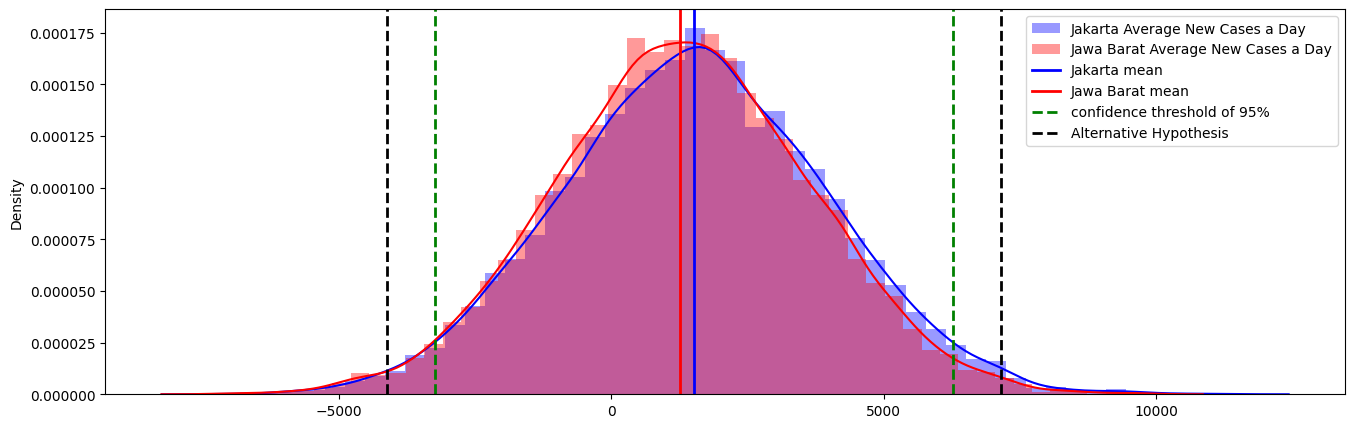

In [25]:
jkt_pop = np.random.normal(daily_jakarta.Cases.mean(),daily_jakarta.Cases.std(),10000)
jabar_pop = np.random.normal(daily_jabar.Cases.mean(),daily_jabar.Cases.std(),10000)

ci = stats.norm.interval(0.95, daily_jakarta.Cases.mean(), daily_jakarta.Cases.std())
plt.figure(figsize=(16,5))
sns.distplot(jkt_pop, label='Jakarta Average New Cases a Day ',color='blue')
sns.distplot(jabar_pop, label='Jawa Barat Average New Cases a Day',color='red')

plt.axvline(daily_jakarta.Cases.mean(), color='blue', linewidth=2, label='Jakarta mean')
plt.axvline(daily_jabar.Cases.mean(), color='red',  linewidth=2, label='Jawa Barat mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(jkt_pop.mean()+t_stat[0]*jkt_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(jkt_pop.mean()-t_stat[0]*jkt_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Based on the result above, we can conclude that **we reject the null hypothesis** which between the jakarta and jawa barat are significantly different in terms of new cases per day.